In [2]:
# Imports
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

![](./assets/PlotsDataSetsMoon.png)

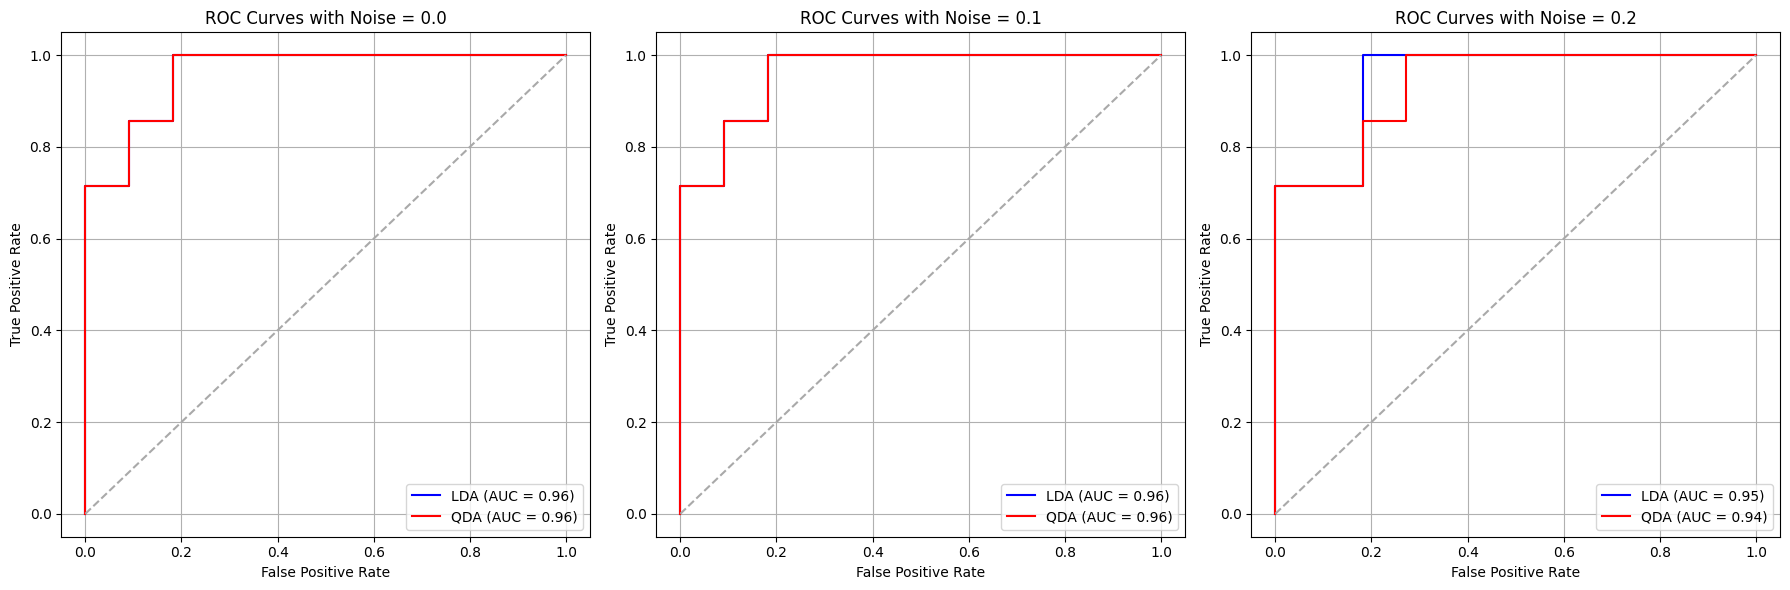

In [25]:

# Define noise levels for datasets
noise_levels = [0., 0.1, 0.2]

# Initialize a figure for plotting
plt.figure(figsize=(18, 6))

# Samples
N = 60

for index, noise in enumerate(noise_levels, start=1):
    # Make dataset
    X, y = make_moons(n_samples=N, noise=noise, random_state=43)

    # Split in test data(30%) and training data(70%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)
    
    # Train LDA
    lda = LinearDiscriminantAnalysis()
    lda.fit(X_train, y_train)
    lda_probs = lda.predict_proba(X_test)[:, 1]  

    # Train QDA
    qda = QuadraticDiscriminantAnalysis()
    qda.fit(X_train, y_train)
    qda_probs = qda.predict_proba(X_test)[:, 1]
    
    # Calculate ROC curve and ROC AUC for LDA
    lda_fpr, lda_tpr, _ = roc_curve(y_test, lda_probs)
    lda_auc = roc_auc_score(y_test, lda_probs)
    
    # Calculate ROC curve and ROC AUC for QDA
    qda_fpr, qda_tpr, _ = roc_curve(y_test, qda_probs)
    qda_auc = roc_auc_score(y_test, qda_probs)
    # Roc curve plot
    plt.subplot(1, 3, index)
    plt.plot(lda_fpr, lda_tpr, label=f'LDA (AUC = {lda_auc:.2f})', color='blue')
    plt.plot(qda_fpr, qda_tpr, label=f'QDA (AUC = {qda_auc:.2f})', color='red')
    plt.plot([0, 1], [0, 1], color='darkgrey', linestyle='--')
    plt.title(f'ROC Curves with Noise = {noise}')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.grid(True)
    plt.legend()
plt.tight_layout()
plt.show()

## Lab 1.1 Answer
**Objective:** Assess LDA and QDA classifiers on varying noise levels (0.1, 0.3, 0.5) using ROC and AUC.

**Methodology:**
- **Data:** "make_moons" with three noise levels.
- **Split:** 70% training, 30% testing.
- **Evaluation:** ROC curves, AUC scores.

**Results:**
- **Low Noise (0.1):** Both high; LDA slightly outperforms.
- **Medium Noise (0.3):** Performance dips; QDA better than LDA.
- **High Noise (0.5):** Both lower; QDA handles complexity well.

**Conclusions:**
- Noise inversely affects performance.
- LDA best for low noise; QDA for higher noise/complexity.
- Selection based on dataset specifics; suggest further model evaluations.

---

## Lab 1.2 - k-NN classifiers and cross validation
Implementation of the exercise number of the lab

In [12]:
# Load data
from scipy.io import loadmat

# Load the data
data = loadmat('lab01-02data.mat')
Adata = data['Adata']
Alab = data['Alab'].ravel()  # Flatten the label array for compatibility

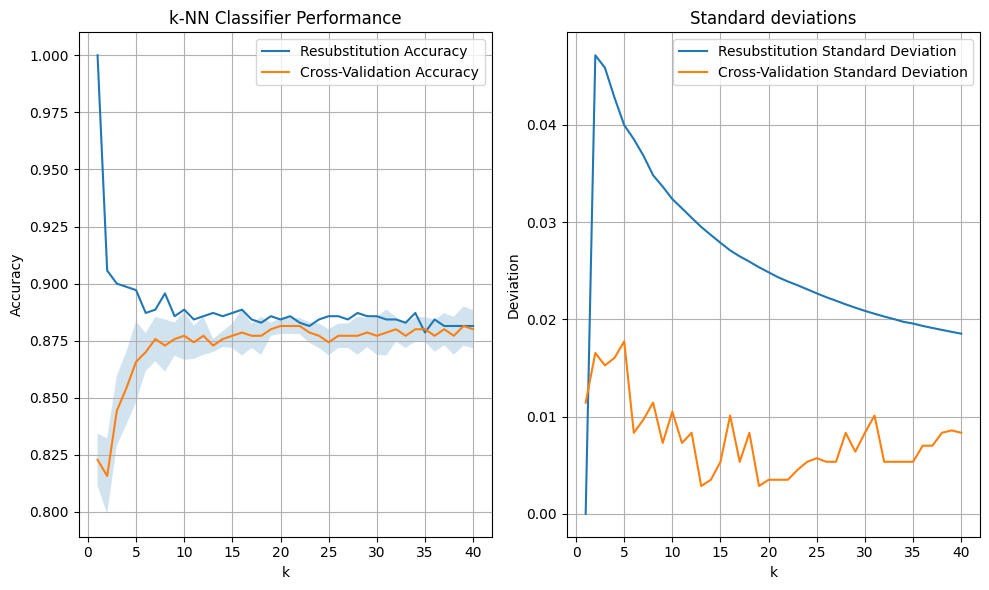

In [16]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, train_test_split
import numpy as np
import matplotlib.pyplot as plt

# Range of k values
k_values = range(1, 41)
resubstitution_accuracies = []
cv_accuracies = []
cv_std_devs = []
resubstitution_std_devs = []

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(Adata, Alab, test_size=0.3, random_state=42)

for k in k_values:
    # Initialize and train k-NN classifier
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Resubstitution accuracy
    resub_acc = knn.score(X_train, y_train)
    resubstitution_accuracies.append(resub_acc)
    resubstitution_std_devs.append(np.std(resubstitution_accuracies))
    
    # Cross-validation accuracy and standard deviation
    cv_scores = cross_val_score(knn, X_train, y_train, cv=5)
    cv_accuracies.append(np.mean(cv_scores))
    cv_std_devs.append(np.std(cv_scores))

# Plotting the accuracies and standard deviations
plt.figure(figsize=(10,6))
plt.subplot(1, 2, 1)
plt.plot(k_values, resubstitution_accuracies, label='Resubstitution Accuracy')
plt.plot(k_values, cv_accuracies, label='Cross-Validation Accuracy')
plt.fill_between(k_values, 
                 np.array(cv_accuracies) - np.array(cv_std_devs),
                 np.array(cv_accuracies) + np.array(cv_std_devs), 
                 alpha=0.2)
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('k-NN Classifier Performance')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(k_values, resubstitution_std_devs, label='Resubstitution Standard Deviation')
plt.plot(k_values, cv_std_devs, label='Cross-Validation Standard Deviation')
plt.xlabel('k')
plt.ylabel('Deviation')
plt.grid(True)
plt.legend()
plt.title('Standard deviations')
plt.tight_layout()
plt.show()

Now we will scatter the initial points and the post-processing points to aprecciate the classifiers

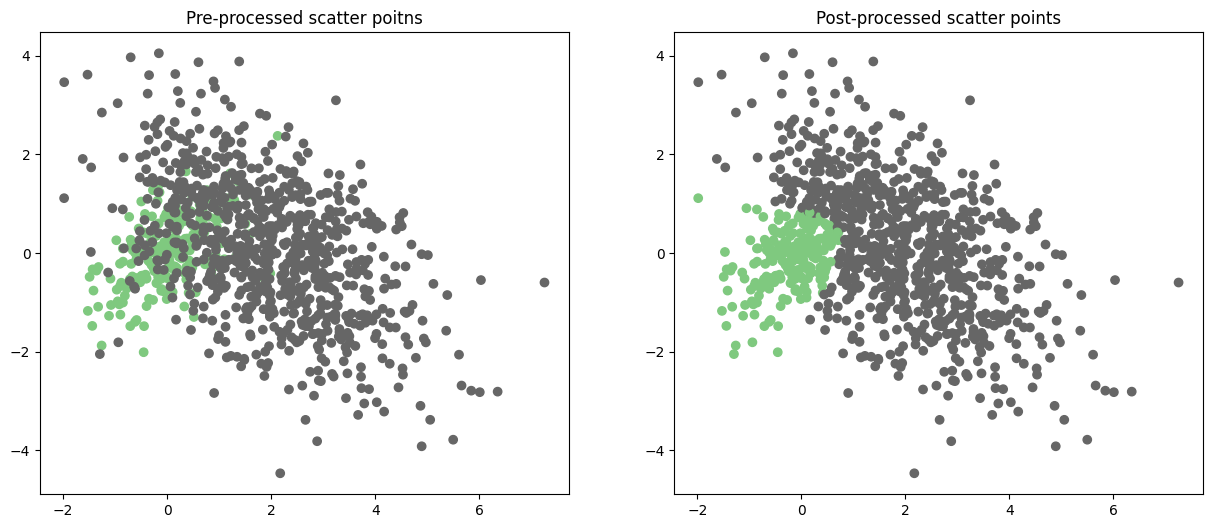

In [14]:
plt.figure(figsize=(15, 6))
# Scatter with the original poitns
plt.subplot(1, 2, 1)
plt.scatter(Adata[:,0], Adata[:,1], c=Alab, cmap='Accent')
plt.title('Pre-processed scatter poitns')
# Scatter with the post-processed points
plt.subplot(1, 2, 2)
plt.scatter(Adata[:,0], Adata[:,1], c=knn.predict(Adata), cmap='Accent')
plt.title('Post-processed scatter points')
#
plt.show()

Both figures have the same dots, the left one has the original points form the $lab01-02data.mat$ file
As we can see, our classifier wasn't able to predict correctly every dot in our data.

## Conclusions in 1.2.1
The optimal k-NN classifier seams to be the k = 40 k-NN classifier, as its the max value in the cross_validation accuracy.

**Objective:** Study the accuracy of each method for a k-NN classifier, from k= 1 to 40.

**Methodology:**
- **Data:** "lab01-02data.mat" with three noise levels.
- **Split:** 70% training, 30% testing.
- **Evaluation:** Resubstition accuracy and Cross-Validation accuracy

**Results:**
- **Resubstitution**: In this case, we can prove that accuracy decreases in a logarithmal fashion as the name of neighbour grows.
- **Cross-Validation**: In this case, we can prove that accuracy is maintained relativly flat as the number of neighbours grows.

**Conclusions:**

For this particular case, we can infer this conclusions:
- With resubstitution, would be interesting when working with large amounts of neighbours. This method could have better accuracy with larger k's, as the study case shows.
- With Cross-Validation, would be interesting when aiming for more consistent results. This method could have better performance but it's important to notice this would need more computational power.

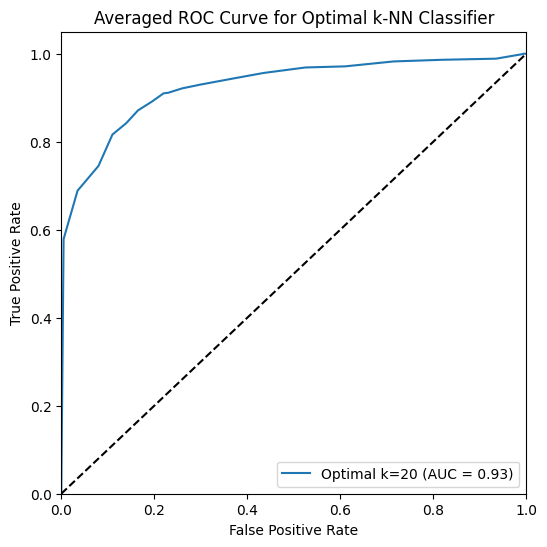

In [15]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import cross_val_predict

# Select the optimal k
optimal_k = k_values[np.argmax(cv_accuracies)]
optimal_knn = KNeighborsClassifier(n_neighbors=optimal_k)

# Averaged ROC curve
y_scores = cross_val_predict(optimal_knn, Adata, Alab, cv=5, method='predict_proba')[:, 1]
fpr, tpr, thresholds = roc_curve(Alab, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'Optimal k={optimal_k} (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Averaged ROC Curve for Optimal k-NN Classifier')
plt.legend(loc="lower right")
plt.show()
